313/313 [==============================] - 1s 3ms/step


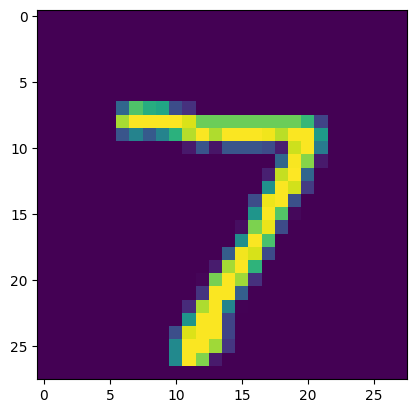

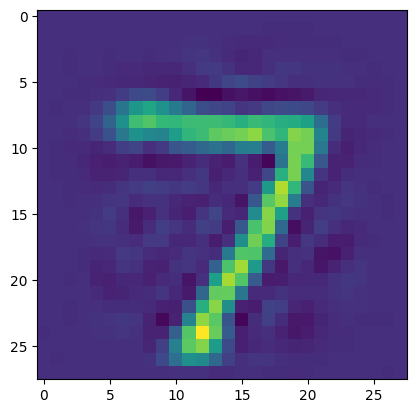

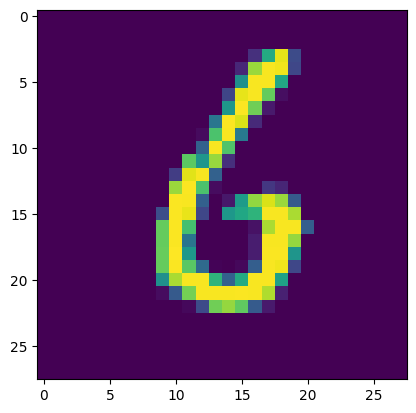

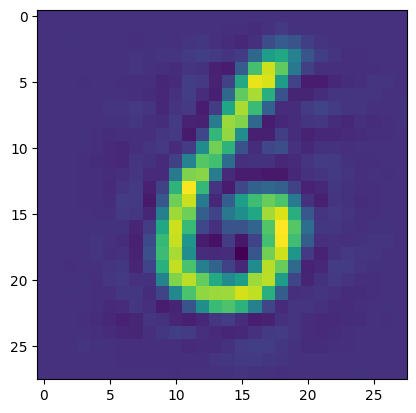

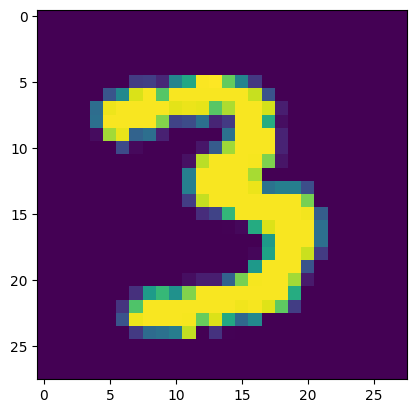

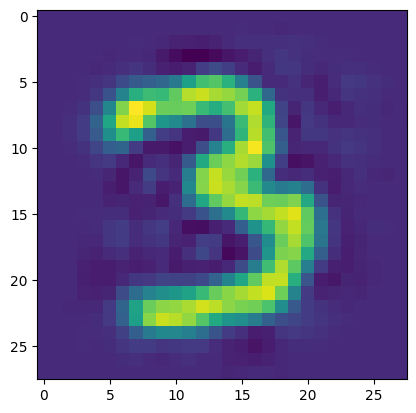

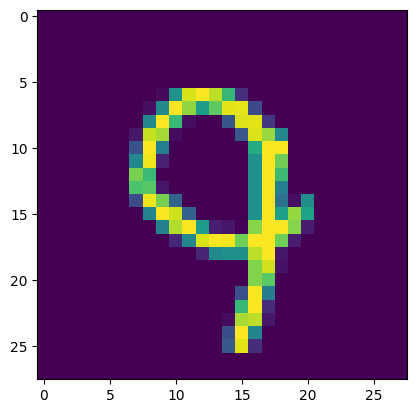

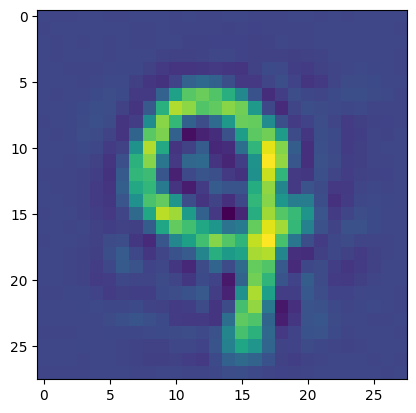

In [3]:
import numpy as np, random
import matplotlib.pyplot as plt

def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

from keras.datasets import mnist
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0

import tensorflow as tf
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

plt.imshow(test_images[0].reshape((28, 28)))
plt.show()
plt.imshow(reconstructed_images[0].reshape((28, 28)))
plt.show()

plt.imshow(test_images[50].reshape((28, 28)))
plt.show()
plt.imshow(reconstructed_images[50].reshape((28, 28)))
plt.show()

plt.imshow(test_images[500].reshape((28, 28)))
plt.show()
plt.imshow(reconstructed_images[500].reshape((28, 28)))
plt.show()

plt.imshow(test_images[999].reshape((28, 28)))
plt.show()
plt.imshow(reconstructed_images[999].reshape((28, 28)))
plt.show()

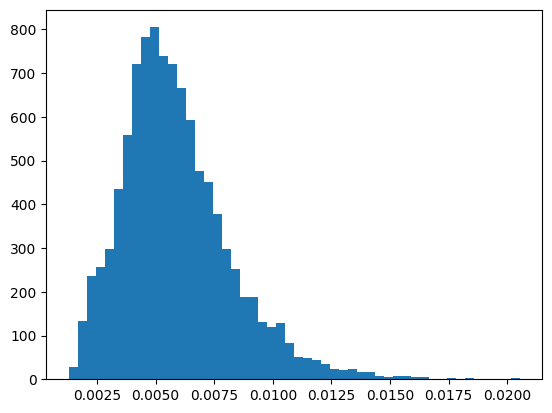

In [4]:
diff = test_images - reconstructed_images
squared_diff = diff * diff
mse = np.mean(squared_diff, axis=1)

plt.hist(mse, bins=50)
plt.show()

In [5]:
mean = np.mean(mse)
std = np.std(mse)

from scipy import stats
ks_statistic, p_value = stats.kstest(mse, cdf='norm', args=(mean, std))

print(p_value)

4.540748572930165e-43
